# Avaliação Parcial I de Mineração de Dados

- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

### Imports Iniciais

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lendo o Dataset

In [95]:
wine_df = pd.read_csv('wine_ap1.csv')

In [96]:
wine_df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,NaN,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Excluindo a Primeira Coluna

In [97]:
wine_df = wine_df.drop(labels='Unnamed: 0', axis=1)

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,NaN,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 1ª Questão

### Alternativa a)

In [98]:
#Verificando a média de um atributo
np.mean(wine_df['alcohol'])

13.038875739644961

In [99]:
#Verificando a quantidade de valores faltantes de cada atributo
wine_df.isna().sum()

alcohol                          9
malic_acid                      11
ash                              6
alcalinity_of_ash                9
magnesium                       13
total_phenols                    9
flavanoids                      13
nonflavanoid_phenols            13
proanthocyanins                 11
color_intensity                  7
hue                             13
od280/od315_of_diluted_wines     6
proline                          8
y                                0
dtype: int64

In [100]:
# Fazendo a atribuição da média dos valores na mesma classe

wine_df = wine_df.fillna(wine_df.median())

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,1.86,2.36,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [101]:
#Verificando novamente a média de um atributo
np.mean(wine_df['alcohol'])

13.039438202247183

In [102]:
# Verificando novamente se ainda existe algum valor faltante
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
y                               0
dtype: int64

### Alternativa b)

In [103]:
wine_df.corr().style.background_gradient('viridis')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
alcohol,1,0.062202,0.208739,-0.305669,0.256404,0.235187,0.202868,-0.117768,0.126827,0.508957,-0.0330736,0.0459135,0.612879,-0.329961
malic_acid,0.062202,1,0.155624,0.285249,-0.0427563,-0.323286,-0.388871,0.274524,-0.152446,0.234128,-0.534488,-0.344484,-0.176132,0.413641
ash,0.208739,0.155624,1,0.427755,0.315698,0.128583,0.10541,0.182898,0.0447385,0.257517,-0.0533816,-0.00421742,0.205142,-0.0312044
alcalinity_of_ash,-0.305669,0.285249,0.427755,1,-0.011388,-0.339164,-0.366496,0.329686,-0.189437,0.0442877,-0.269399,-0.269339,-0.427062,0.506563
magnesium,0.256404,-0.0427563,0.315698,-0.011388,1,0.187884,0.185013,-0.217937,0.194297,0.218675,0.0347432,0.0592888,0.374586,-0.187671
total_phenols,0.235187,-0.323286,0.128583,-0.339164,0.187884,1,0.853568,-0.409297,0.564469,-0.0931312,0.42216,0.686201,0.452074,-0.710195
flavanoids,0.202868,-0.388871,0.10541,-0.366496,0.185013,0.853568,1,-0.526678,0.559356,-0.19577,0.520323,0.752343,0.444938,-0.815497
nonflavanoid_phenols,-0.117768,0.274524,0.182898,0.329686,-0.217937,-0.409297,-0.526678,1,-0.349597,0.169038,-0.222075,-0.460449,-0.294138,0.469847
proanthocyanins,0.126827,-0.152446,0.0447385,-0.189437,0.194297,0.564469,0.559356,-0.349597,1,-0.0167805,0.25538,0.484031,0.336798,-0.466666
color_intensity,0.508957,0.234128,0.257517,0.0442877,0.218675,-0.0931312,-0.19577,0.169038,-0.0167805,1,-0.493004,-0.439577,0.27269,0.277916


In [104]:
(wine_df.corr() > 0.5).sum()-1

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               1
magnesium                       0
total_phenols                   3
flavanoids                      4
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 1
hue                             2
od280/od315_of_diluted_wines    3
proline                         1
y                               1
dtype: int64

In [105]:
wine_df.cov().style.background_gradient('viridis')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
alcohol,0.605298,0.0535342,0.04348,-0.775974,2.68038,0.112486,0.152361,-0.0110852,0.0552946,0.906225,-0.00573318,0.0247449,145.162,-0.198961
malic_acid,0.0535342,1.22373,0.0460912,1.02962,-0.63552,-0.219851,-0.415263,0.0367411,-0.0945028,0.592742,-0.131738,-0.26398,-59.3163,0.354639
ash,0.04348,0.0460912,0.0716803,0.373686,1.13569,0.0211632,0.0272431,0.00592433,0.00671223,0.157789,-0.00318435,-0.000782181,16.7205,-0.00647496
alcalinity_of_ash,-0.775974,1.02962,0.373686,10.6469,-0.499283,-0.68033,-1.1544,0.130149,-0.346387,0.330723,-0.195856,-0.608793,-424.225,1.28105
magnesium,2.68038,-0.63552,1.13569,-0.499283,180.54,1.55194,2.39973,-0.354282,1.46298,6.72443,0.104012,0.551848,1532.26,-1.95436
total_phenols,0.112486,-0.219851,0.0211632,-0.68033,1.55194,0.377918,0.506537,-0.0304416,0.194457,-0.131028,0.0578236,0.29222,84.6063,-0.338375
flavanoids,0.152361,-0.415263,0.0272431,-1.1544,2.39973,0.506537,0.931858,-0.0615107,0.302586,-0.432504,0.111912,0.503096,130.758,-0.610125
nonflavanoid_phenols,-0.0110852,0.0367411,0.00592433,0.130149,-0.354282,-0.0304416,-0.0615107,0.0146373,-0.0237019,0.0468042,-0.00598631,-0.0385897,-10.8337,0.0440564
proanthocyanins,0.0552946,-0.0945028,0.00671223,-0.346387,1.46298,0.194457,0.302586,-0.0237019,0.31403,-0.0215209,0.0318861,0.187897,57.4578,-0.202681
color_intensity,0.906225,0.592742,0.157789,0.330723,6.72443,-0.131028,-0.432504,0.0468042,-0.0215209,5.23769,-0.251391,-0.696891,189.991,0.492952


### Alternativa c)

In [106]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [107]:
X = wine_df.values[:, :-1]
y = wine_df.values[:, -1]

In [108]:
X.shape 

(178, 13)

In [109]:
y.shape

(178,)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)

In [111]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train) 

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

clf = SVC(C=1).fit(X_train_std, y_train)
clf.score(X_test_std, y_test)

0.9777777777777777

In [112]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

clf = make_pipeline(preprocessing.StandardScaler(), SVC(C=1))
cross_val_score(clf, X_test_std, y_test, cv=5)

array([1.   , 1.   , 1.   , 1.   , 0.875])

## 2ª Questão

**Algoritmo *DecisionTreeClassifier()***

In [113]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [114]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.8666666666666667

**Algoritmo *KNeighborsClassifier()***

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
y_pred_knn = dt.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8666666666666667

## 3ª Questão

In [ ]:
from sklearn.metrics import confusion_matrix as cf

def accuracy_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    return np.sum(np.diagonal(cm))/np.sum(cm)

def precision_score(y, y_p):
    cm = confusion_matrix(y, y_p, labels=np.unique(y))
    pond = np.unique(y, return_counts=True)[1]
    pre = []
    for i in range(cm.shape[0]): 
        pre.append((pond[i] * cm[i,i]) / np.sum(cm[:,i]))
    return np.sum(pre)/np.sum(pond)

def recall_score(y, y_p):
    cm = confusion_matrix(y, y_p, labels=np.unique(y))
    pond = np.unique(y, return_counts=True)[1]
    pre = []
    for i in range(cm.shape[0]): 
        pre.append((pond[i] * cm[i,i]) / np.sum(cm[i]))
    return np.sum(pre)/np.sum(pond)

def f1_measure_score(y, y_p):
    recall = recall_score(y, y_p)
    precision = precision_score(y, y_p)
    return 2 * ((precision * recall) / (precision + recall))

## 4ª Questão

#### **Algoritmo *KMeans()***

In [122]:
from sklearn.cluster import KMeans

In [123]:
inertias = []

for k in range(1, 10, 2):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

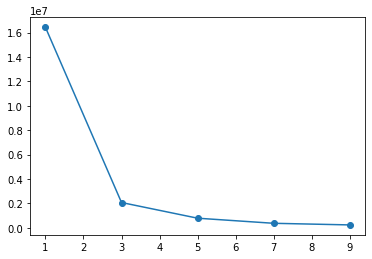

In [132]:
plt.plot(range(1, 10, 2), inertias, marker='o');